# Netflix Exploratory Data Analysis

## Description

#### Source: Kaggle
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix = pd.read_csv(r'netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
netflix.shape

(8807, 12)

In [6]:
netflix.size

105684

In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Check for duplicate records and remove them

In [10]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [11]:
netflix.shape

(8807, 12)

In [12]:
netflix[netflix.duplicated()] #checks for duplicates and none was found

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
#netflix.drop_duplicates() could have been used to drop duplicate rows permanently

In [14]:
netflix.shape

(8807, 12)

In [15]:
netflix.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6315,s6316,Movie,Birthmarked,Emanuel Hoss-Desmarais,"Toni Collette, Matthew Goode, Andreas Apergis,...",Canada,"June 28, 2018",2018,TV-MA,88 min,"Comedies, Independent Movies, International Mo...","In an attempt to settle the ""nature vs. nurtur..."
3888,s3889,Movie,Loving is Losing,Fernando Ayllón,"Ricardo Quevedo, Liss Pereira, Iván Marín, Lor...",Colombia,"April 26, 2019",2019,TV-MA,91 min,"Comedies, International Movies, Romantic Movies",When a newly single photographer is forced to ...
7819,s7820,Movie,Radiopetti,Hari Viswanath,"Lakshmanan, TVV Ramanujam, Shobana, Nivas Adit...",India,"January 1, 2017",2015,TV-PG,83 min,"Dramas, International Movies","An elderly, hearing-impaired Indian man stays ..."
4226,s4227,TV Show,The Paper,NaN,"Branka Katić, Trpimir Jurkic, Aleksandar Cvetk...",Croatia,"January 1, 2019",2018,TV-MA,2 Seasons,"International TV Shows, TV Dramas",A construction magnate takes over a struggling...
1324,s1325,Movie,Middle of Nowhere,Ava DuVernay,"Emayatzy Corinealdi, David Oyelowo, Omari Hard...",United States,"February 11, 2021",2012,R,102 min,"Dramas, Independent Movies, Romantic Movies",After her husband is sent to prison for eight ...
6481,s6482,Movie,Christopher Robin,Marc Forster,"Ewan McGregor, Hayley Atwell, Bronte Carmichae...",United States,"March 5, 2019",2018,PG,104 min,"Children & Family Movies, Comedies, Dramas","Now a careworn middle-aged man, Christopher Ro..."
1600,s1601,Movie,Chico Bon Bon and the Very Berry Holiday,Darragh O'Connell,"Robbie Daymond, Dayci Brookshire, Anthony Tede...",NaN,"December 3, 2020",2020,TV-Y,25 min,Children & Family Movies,The Fix-It Force makes a plan to hit every hom...
2813,s2814,TV Show,Ken Burns Presents: College Behind Bars: A Fil...,Lynn Novick,NaN,United States,"March 15, 2020",2019,TV-MA,1 Season,Docuseries,This docuseries follows several incarcerated p...
2493,s2494,Movie,Anchor Baby,Lonzo Nzekwe,"Omoni Oboli, Sam Sarpong, Terri Oliver, Colin ...","Canada, Nigeria","May 20, 2020",2010,TV-MA,97 min,"Dramas, International Movies",A Nigerian couple living in the U.S. face agon...
4989,s4990,Movie,Ricky Gervais: Humanity,John L. Spencer,Ricky Gervais,United Kingdom,"March 13, 2018",2018,TV-MA,79 min,Stand-Up Comedy,"In his first special in seven years, Ricky Ger..."


### Check for Null Values present in any column and use a heat map to show 

In [16]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [17]:
netflix.isnull() #checks for columns with null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
netflix.isnull().sum() #returns count of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
null_percent = netflix.isnull().sum() * 100 / len(netflix)
null_percent

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### Heat Map

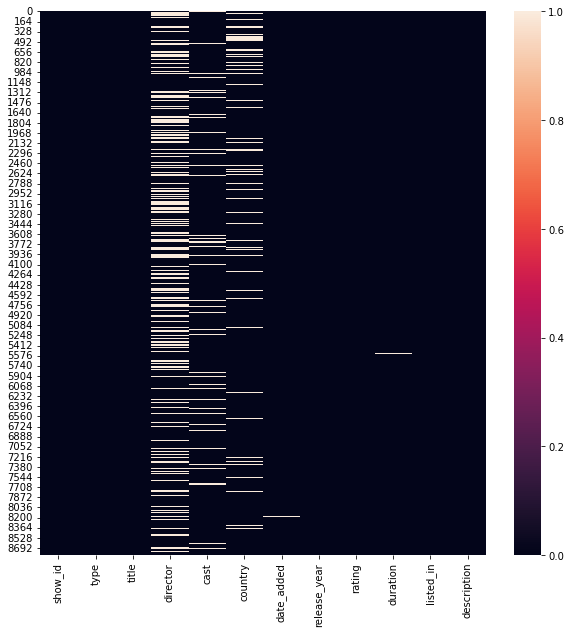

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(netflix.isnull());

### What is the show_id for "The Lord of the Rings: The Return of the King" and who is the director of this movie?

In [21]:
netflix[netflix.title == 'The Lord of the Rings: The Return of the King'][['show_id', 'director']]

,show_id,director
8404,s8405,Peter Jackson


In [22]:
netflix[['show_id', 'director']][netflix['title'].isin(['The Lord of the Rings: The Return of the King'])]

,show_id,director
8404,s8405,Peter Jackson


In [23]:
netflix[netflix['title'].str.contains('The Lord of the Rings: The Return of the King')][['show_id', 'director']]

,show_id,director
8404,s8405,Peter Jackson


### In which year was the highest number of TV Shows and Movies released?

In [24]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [25]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [26]:
netflix.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

#### Bar Graph

In [27]:
plt.style.use('ggplot')

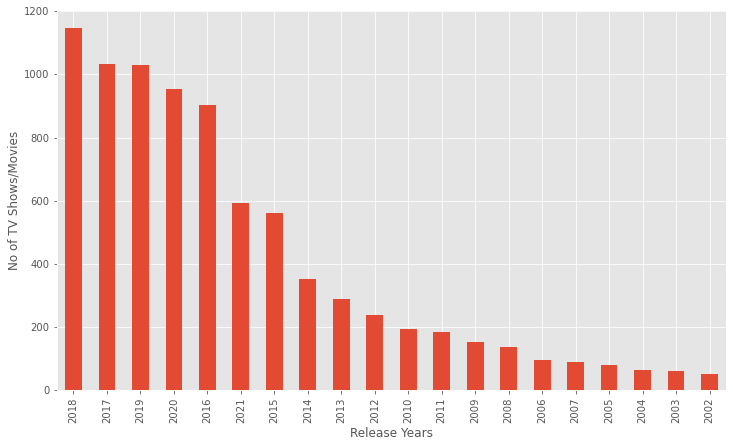

In [28]:
ax = netflix.release_year.value_counts().head(20).plot(kind='bar', figsize=(12,7));
ax.set_xlabel('Release Years');
ax.set_ylabel('No of TV Shows/Movies');

### In which year was the lowest number of TV Shows and Movies released?

In [29]:
netflix.release_year.value_counts().sort_values(ascending=True).head(10)

1966    1
1959    1
1947    1
1961    1
1925    1
1954    2
1942    2
1946    2
1965    2
1956    2
Name: release_year, dtype: int64

### In which year was the highest number of TV Shows and Movies added?

In [30]:
netflix.date_added = netflix.date_added.astype(np.datetime64)

In [31]:
netflix.date_added

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [32]:
netflix.date_added.dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

#### Bar Graph

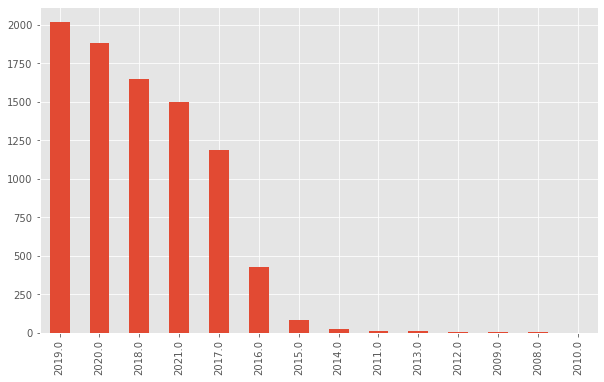

In [33]:
netflix.date_added.dt.year.value_counts().plot(kind='bar', figsize=(10,6));

### In which year was the lowest number of TV Shows and Movies added?

In [34]:
netflix.date_added.dt.year.value_counts().sort_values(ascending=True)

2010.0       1
2009.0       2
2008.0       2
2012.0       3
2013.0      11
2011.0      13
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2021.0    1498
2018.0    1649
2020.0    1879
2019.0    2016
Name: date_added, dtype: int64

### How many TV Shows and Movies are in the dataset?

In [35]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [36]:
netflix.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

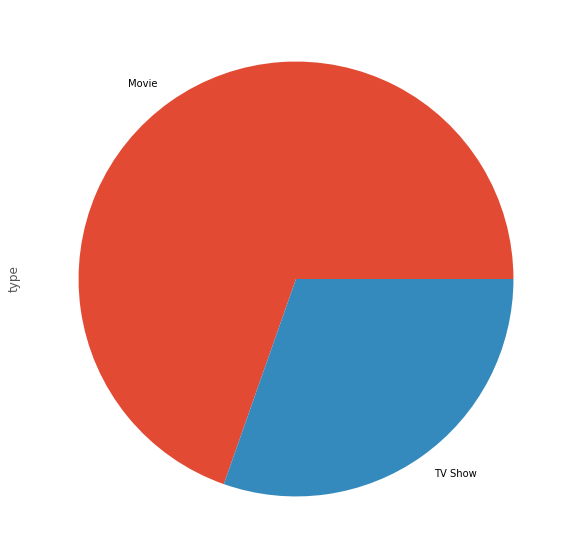

In [37]:
netflix.groupby('type').type.count().plot(kind='pie', figsize=(10,10));

#### Count plot(alternative)

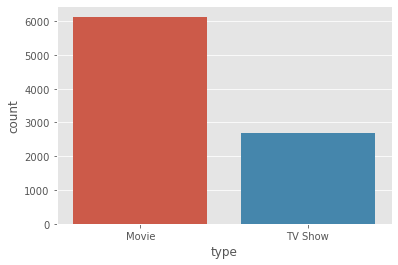

In [38]:
sns.countplot(netflix['type']);

### Show movies that were added in the year 2019

In [39]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


#### Creating new column for year

In [40]:
netflix['year_added'] = netflix.date_added.dt.year

In [41]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


#### Filtering for year 2019

In [42]:
netflix[(netflix['type'] == 'Movie') & (netflix['year_added'] == 2019)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
3077,s3078,Movie,Aaviri,Ravi Babu,"Ravi Babu, Neha Chauhan, Sri Muktha, Bharani S...",India,2019-12-31,2019,TV-14,110 min,"Horror Movies, International Movies, Thrillers","After losing their first child in an accident,...",2019.0
3078,s3079,Movie,Albert Pinto Ko Gussa Kyun Aata Hai?,Soumitra Ranade,"Nandita Das, Manav Kaul, Saurabh Shukla, Kisho...",India,2019-12-31,2019,TV-MA,85 min,"Dramas, Independent Movies, International Movies","As the police investigate his disappearance, a...",2019.0
3080,s3081,Movie,Benchwarmers 2: Breaking Balls,Jon Rosenbaum,"Chris Klein, Jon Lovitz, Chelsey Reist, Lochly...",United States,2019-12-31,2019,PG-13,90 min,"Comedies, Sports Movies",A rookie lawyer with an emasculating past in b...,2019.0
3081,s3082,Movie,How High 2,Bruce Leddy,"Lil Yachty, D.C. Young Fly, Alyssa Goss, DeRay...",United States,2019-12-31,2019,TV-MA,89 min,Comedies,"When a pair of friends uncover a weed Bible, t...",2019.0
3089,s3090,Movie,Hot Gimmick: Girl Meets Boy,Yuki Yamato,"Miona Hori, Hiroya Shimizu, Shotaro Mamiya, Mi...",Japan,2019-12-28,2019,TV-MA,120 min,"Dramas, International Movies",A quiet teen's life is shaken up when she's fo...,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,2019.0
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2019.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


### Show only title of TV Shows released in Nigeria only

In [43]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [44]:
netflix.title[(netflix['type'] == 'TV Show') & (netflix['country'] == 'Nigeria')]

49                         Castle and Castle
198     King of Boys: The Return of the King
1654                               Before 30
2102                        Ojos in d' House
2148                            The Governor
2906                             On the Real
2938                       Fifty: The Series
2992                   Sons of the Caliphate
3130                     Crazy, Lovely, Cool
Name: title, dtype: object

### Show Top 10 directors who gave the highest number of Movies or TV Shows to Netflix

In [45]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [46]:
netflix.director.value_counts().sort_values(ascending=False)

Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
                            ..
Austin Stark                 1
Kristian Levring             1
Ajay Bhuyan, Kunal Kohli     1
Karan Lalit Butani           1
Mozez Singh                  1
Name: director, Length: 4528, dtype: int64

#### Horizontal Bar plot

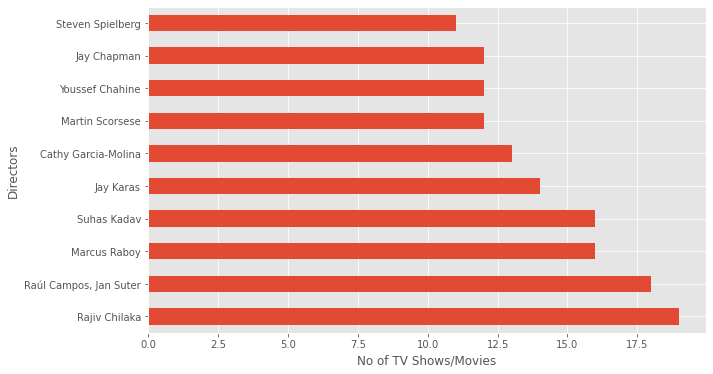

In [47]:
ax1 = netflix.director.value_counts().head(10).plot(kind='barh', figsize=(10,6))
ax1.set_xlabel('No of TV Shows/Movies');
ax1.set_ylabel('Directors');

### Show all the records where "Type is Movie and Listed_in contain Comedies" or "Country is United States"

In [48]:
netflix.listed_in.unique

<bound method Series.unique of 0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object>

In [49]:
mov_com = (netflix['type'] == 'Movies') & (netflix.listed_in.str.contains(r'[cC]omedies', regex=True))
usa = netflix.country == 'United States'

In [50]:
netflix[mov_com | usa]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019.0
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,2019.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


### How many Movies or TV Shows was ONLY Kevin Hart cast?

In [51]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [52]:
netflix[netflix['cast'] == 'Kevin Hart']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1686,s1687,Movie,Kevin Hart: Zero F**ks Given,Leslie Small,Kevin Hart,United States,2020-11-17,2020,TV-MA,70 min,Stand-Up Comedy,Kevin Hart serves up laughs and brick oven piz...,2020.0
2978,s2979,Movie,Kevin Hart: I'm a Grown Little Man,Shannon Hartman,Kevin Hart,United States,2020-01-30,2009,TV-MA,62 min,Stand-Up Comedy,Stand-up comedy star Kevin Hart delivers his u...,2020.0
3952,s3953,Movie,Kevin Hart: Irresponsible,Leslie Small,Kevin Hart,United States,2019-04-02,2019,TV-MA,60 min,Stand-Up Comedy,"As a father of three on his second marriage, K...",2019.0
7178,s7179,Movie,Kevin Hart: Laugh at My Pain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-10-01,2011,R,89 min,Stand-Up Comedy,"Sometimes edgy and always hilarious, comedian ...",2018.0
7179,s7180,Movie,Kevin Hart: Let Me Explain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-07-13,2013,R,75 min,Stand-Up Comedy,Philadelphia funnyman Kevin Hart takes the sta...,2018.0
7180,s7181,Movie,Kevin Hart: Seriously Funny,Shannon Hartman,Kevin Hart,United States,2018-10-01,2010,TV-MA,67 min,Stand-Up Comedy,"With his unique hip-hop style delivery, Africa...",2018.0


In [53]:
len(netflix[netflix['cast'] == 'Kevin Hart'])

6

### How many Movies or TV Shows contains Kevin Hart as cast?

In [54]:
#netflix[netflix['cast'].str.contains('Kevin Hart')].... Unfortunately this would return an error because str.contains cannot work under NaN values

#### Dropping NaNs and Creating New DataFrame

In [55]:
netflix2 = netflix.dropna()

In [56]:
netflix2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0


In [57]:
netflix2[netflix2['cast'].str.contains('Kevin Hart')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
685,s686,Movie,Fatherhood,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,2021-06-18,2021,PG-13,111 min,Dramas,"A widowed new dad copes with doubts, fears, he...",2021.0
1686,s1687,Movie,Kevin Hart: Zero F**ks Given,Leslie Small,Kevin Hart,United States,2020-11-17,2020,TV-MA,70 min,Stand-Up Comedy,Kevin Hart serves up laughs and brick oven piz...,2020.0
2978,s2979,Movie,Kevin Hart: I'm a Grown Little Man,Shannon Hartman,Kevin Hart,United States,2020-01-30,2009,TV-MA,62 min,Stand-Up Comedy,Stand-up comedy star Kevin Hart delivers his u...,2020.0
3952,s3953,Movie,Kevin Hart: Irresponsible,Leslie Small,Kevin Hart,United States,2019-04-02,2019,TV-MA,60 min,Stand-Up Comedy,"As a father of three on his second marriage, K...",2019.0
4121,s4122,Movie,Kevin Hart's Guide to Black History,Tom Stern,"Kevin Hart, Saniyya Sidney, Lil Rel Howery, Eo...",United States,2019-02-08,2019,TV-PG,63 min,"Children & Family Movies, Comedies",Kevin Hart highlights the fascinating contribu...,2019.0
5535,s5536,Movie,Kevin Hart: What Now?,Leslie Small,"Kevin Hart, Don Cheadle, Halle Berry, Ed Helms...",United States,2017-04-11,2016,R,96 min,Stand-Up Comedy,Frenetic comic Kevin Hart hits Philadelphia an...,2017.0
6583,s6584,Movie,Death at a Funeral,Neil LaBute,"Chris Rock, Martin Lawrence, Tracy Morgan, Dan...",United States,2020-08-01,2010,R,93 min,Comedies,"When a Los Angeles family's patriarch dies, hi...",2020.0
6721,s6722,Movie,Exit Strategy,Michael Whitton,"Jameel Saleem, Kimelia Weathers, Quincy Harris...",United States,2019-03-03,2012,NR,79 min,"Comedies, Romantic Movies","When James's living situation turns sour, he h...",2019.0
7178,s7179,Movie,Kevin Hart: Laugh at My Pain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-10-01,2011,R,89 min,Stand-Up Comedy,"Sometimes edgy and always hilarious, comedian ...",2018.0
7179,s7180,Movie,Kevin Hart: Let Me Explain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-07-13,2013,R,75 min,Stand-Up Comedy,Philadelphia funnyman Kevin Hart takes the sta...,2018.0


In [58]:
netflix2[netflix2['cast'].str.contains('Kevin Hart')].shape[0]

12

### How many movies have PG-13 Ratings in the United Kingdom

In [59]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [60]:
netflix[(netflix.type == 'Movie') & (netflix.rating == 'PG-13') & (netflix.country == 'United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
292,s293,Movie,Quartet,Dustin Hoffman,"Maggie Smith, Tom Courtenay, Billy Connolly, P...",United Kingdom,2021-08-08,2012,PG-13,98 min,"Comedies, Dramas, Independent Movies","To save their posh retirement home, former ope...",2021.0
1370,s1371,Movie,The Dig,Simon Stone,"Carey Mulligan, Ralph Fiennes, Lily James, Joh...",United Kingdom,2021-01-29,2021,PG-13,113 min,"Dramas, International Movies","On the eve of World War II, a British widow hi...",2021.0
1613,s1614,Movie,Effie Gray,Richard Laxton,"Dakota Fanning, Emma Thompson, Julie Walters, ...",United Kingdom,2020-12-01,2014,PG-13,109 min,"Dramas, International Movies, Romantic Movies","Trapped in a loveless marriage, the young wife...",2020.0
1808,s1809,Movie,Fisherman's Friends,Chris Foggin,"Daniel Mays, James Purefoy, David Hayman, Dave...",United Kingdom,2020-10-22,2019,PG-13,112 min,"Comedies, Dramas, Music & Musicals",Sea shanties have long united 10 Cornish fishe...,2020.0
1814,s1815,Movie,Rebecca,Ben Wheatley,"Lily James, Armie Hammer, Kristin Scott Thomas...",United Kingdom,2020-10-21,2020,PG-13,123 min,"Dramas, Romantic Movies, Thrillers",A young newlywed moves to her husband's imposi...,2020.0
1959,s1960,Movie,Enola Holmes,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...",United Kingdom,2020-09-23,2020,PG-13,124 min,"Action & Adventure, Children & Family Movies, ...","While searching for her missing mother, intrep...",2020.0
2097,s2098,Movie,Rising Phoenix,NaN,NaN,United Kingdom,2020-08-26,2020,PG-13,107 min,"Documentaries, International Movies, Sports Mo...",Elite athletes and insiders reflect on the Par...,2020.0
7399,s7400,Movie,Mansfield Park,Patricia Rozema,"Frances O'Connor, Embeth Davidtz, Jonny Lee Mi...",United Kingdom,2020-01-01,1999,PG-13,112 min,"Comedies, Dramas, International Movies",A poor heroine is sent to live with wealthy re...,2020.0


In [61]:
netflix[(netflix.type == 'Movie') & (netflix.rating == 'PG-13') & (netflix.country == 'United Kingdom')].shape[0]

8

### How many TV Shows have 'R' rating after the Release Year of 2015?

In [62]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [63]:
netflix[(netflix.type == 'TV Show') & (netflix.rating == 'R') & (netflix.release_year > 2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7593,s7594,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016-12-10,2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016.0


In [64]:
netflix[(netflix.type == 'TV Show') & (netflix.rating == 'R') & (netflix.release_year > 2015)].shape[0]

1

### What are the different ratings defined by Netflix?

In [65]:
netflix.rating.nunique()

17

In [66]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [67]:
netflix[netflix.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0


In [68]:
L = ['74 min', '84 min', '66 min']

In [69]:
netflix.loc[netflix.duration.isna(), 'duration'] = L

### What is the maximum duration of a TV Show/Movie on Netflix respectively?

In [70]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [71]:
netflix.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [72]:
netflix[['duration_period', 'unit']] = netflix.duration.str.split(' ', expand=True)

In [73]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons


In [74]:
netflix.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
year_added                float64
duration_period            object
unit                       object
dtype: object

In [75]:
netflix.duration_period = netflix.duration_period.astype(int)

In [76]:
netflix.loc[:,['type', 'duration_period']].groupby('type').max()

,duration_period
type,
Movie,312
TV Show,17


#### Alternative

In [77]:
netflix[(netflix.type == 'TV Show')].duration_period.max()

17

In [78]:
netflix[(netflix.type == 'Movie')].duration_period.max()

312

### Which TV Series/Movie has the longest duration respectively?

In [79]:
netflix[['title', 'duration']][(netflix.type =='Movie') & (netflix.duration_period == 312)]

,title,duration
4253,Black Mirror: Bandersnatch,312 min


In [80]:
netflix[['title', 'duration']][(netflix.type =='TV Show') & (netflix.duration_period == 17)]

,title,duration
548,Grey's Anatomy,17 Seasons


###  What is the minimum duration of a TV Show/Movie on Netflix respectively?

In [81]:
netflix.loc[:,['type', 'duration_period']].groupby('type').min()

,duration_period
type,
Movie,3
TV Show,1


###  Which TV Series/Movie has the lowest duration respectively?

In [82]:
netflix[['title', 'duration']][(netflix.type =='Movie') & (netflix.duration_period == 3)]

,title,duration
3777,Silent,3 min


In [83]:
netflix[['title', 'duration']][(netflix.type =='TV Show') & (netflix.duration_period == 1)]

,title,duration
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
5,Midnight Mass,1 Season
10,"Vendetta: Truth, Lies and The Mafia",1 Season
11,Bangkok Breaking,1 Season
...,...,...
8775,Yeh Meri Family,1 Season
8780,Yo-Kai Watch,1 Season
8783,Yoko,1 Season
8785,YOM,1 Season


In [84]:
len(netflix[['title', 'duration']][(netflix.type =='TV Show') & (netflix.duration_period == 1)])

1793

### Which individual country has the highest number of TV Show and plot the first 10 countries

In [85]:
netflix_tv_shows = netflix[(netflix.type == 'TV Show')]

In [86]:
netflix_tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1,Season


In [87]:
netflix_tv_shows.country.value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [88]:
netflix_tv_shows.country.value_counts().head(1)

United States    760
Name: country, dtype: int64

#### Bar Plot

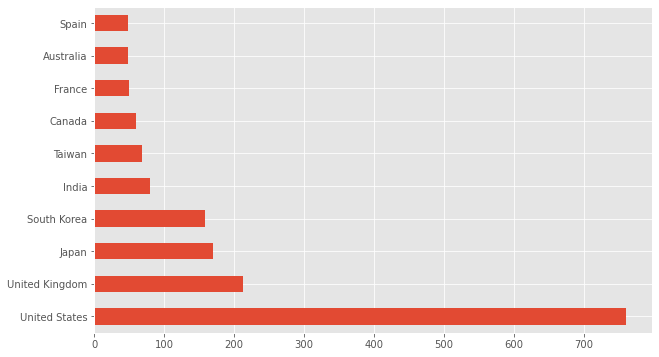

In [89]:
netflix_tv_shows.country.value_counts().head(10).plot(kind='barh', figsize=(10,6));

### Which individual country has the highest number of TV Movie and plot the first 10 countries

In [90]:
netflix_movies = netflix[(netflix.type == 'Movie')]
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,91,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,125,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,104,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,127,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,96,min
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,158,min
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,88,min


In [91]:
netflix_movies.country.value_counts()

United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [92]:
netflix_movies.country.value_counts().head(1)

United States    2058
Name: country, dtype: int64

#### Bar Plot

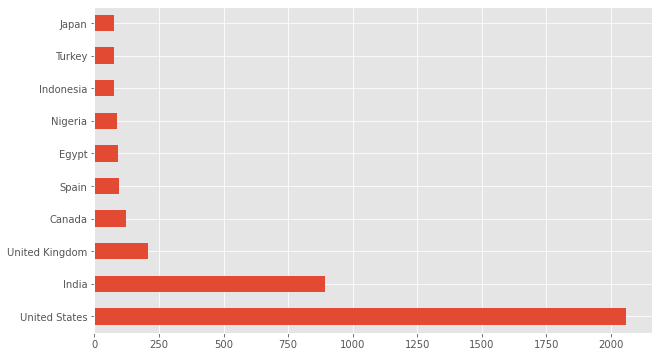

In [93]:
netflix_movies.country.value_counts().head(10).plot(kind='barh', figsize=(10,6));

### Sort values by year added(latest)

In [94]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons


In [95]:
netflix.sort_values(by='year_added', ascending=False).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,2021-04-22,2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,2021.0,116,min
1005,s1006,Movie,Keymon and Nani in Space Adventure,NaN,NaN,NaN,2021-04-20,2013,TV-Y,76 min,"Children & Family Movies, Comedies","For Rohan and his magical pal, Keymon, a trip ...",2021.0,76,min
1004,s1005,TV Show,Izzy's Koala World,NaN,"Izzy Bee, Ali Bee, Tim Bee",Australia,2021-04-20,2021,TV-Y,2 Seasons,Kids' TV,Young koala caretaker Izzy Bee and her family ...,2021.0,2,Seasons
1003,s1004,TV Show,Zero,NaN,"Giuseppe Dave Seke, Haroun Fall, Beatrice Gran...",Italy,2021-04-21,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A shy teen with the power to turn invisible mu...,2021.0,1,Season


### Find instances where type is movie and listed_in is drama or where type is tv show and listed_in is kids' tv

In [96]:
netflix[(netflix.type == 'Movie') & (netflix.listed_in == 'Comedies')].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0,103,min
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,2021-09-01,2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,2021.0,88,min


In [97]:
netflix[(netflix.type == 'TV Show') & (netflix.listed_in == "Kids' TV")].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,2021-09-17,2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021.0,1,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021.0,3,Seasons


In [98]:
netflix[(netflix.type == 'Movie') & (netflix.listed_in == 'Comedies') | (netflix.type == 'TV Show') & (netflix.listed_in == "Kids' TV")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0,103,min
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,2021-09-17,2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021.0,1,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021.0,3,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021.0,6,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,2021-09-09,2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",2021.0,4,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,s8680,TV Show,ViR: The Robot Boy,NaN,"Vidit Kumar, Roopa Bhimani, Anubhav Saha, Bria...",NaN,2018-03-31,2013,TV-Y7,2 Seasons,Kids' TV,Humanoid robot boy ViR lives with his inventor...,2018.0,2,Seasons
8730,s8731,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,2018-01-22,2017,R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018.0,86,min
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0,1,Season
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0,1,Season


### Find unique values from listed_in

In [99]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_period,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,2,Seasons


In [100]:
netflix.listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [101]:
list1 = []
for value in netflix['listed_in']:
    list1.append(value.split(','))

In [102]:
list1

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

In [103]:
list2 = []
for item in list1:
    for item1 in item:
        list2.append(item1)
    

In [104]:
list2

['Documentaries',
 'International TV Shows',
 ' TV Dramas',
 ' TV Mysteries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Docuseries',
 ' Reality TV',
 'International TV Shows',
 ' Romantic TV Shows',
 ' TV Comedies',
 'TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'British TV Shows',
 ' Reality TV',
 'Comedies',
 ' Dramas',
 'Crime TV Shows',
 ' Docuseries',
 ' International TV Shows',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Dramas',
 ' International Movies',
 'Children & Family Movies',
 ' Comedies',
 'British TV Shows',
 ' Crime TV Shows',
 ' Docuseries',
 'TV Comedies',
 ' TV Dramas',
 'Documentaries',
 ' International Movies',
 'Crime TV Shows',
 ' Spanish-Language TV Shows',
 ' TV Dramas',
 'Thrillers',
 'International TV Shows',
 ' Spanish-Language TV Shows',
 ' TV Action & Adventure',
 'Crime TV Shows',
 ' Docuseries',
 ' 

#### To fetch unique values 

In [105]:
unq_list = []
for item in list2:
    if item not in unq_list:
        unq_list.append(item)
        


In [106]:
unq_list

['Documentaries',
 'International TV Shows',
 ' TV Dramas',
 ' TV Mysteries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Docuseries',
 ' Reality TV',
 ' Romantic TV Shows',
 ' TV Comedies',
 'TV Dramas',
 ' TV Horror',
 'Children & Family Movies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'British TV Shows',
 'Comedies',
 ' Dramas',
 ' Docuseries',
 ' Comedies',
 ' Crime TV Shows',
 'TV Comedies',
 ' Spanish-Language TV Shows',
 'Thrillers',
 ' Romantic Movies',
 ' Music & Musicals',
 'Horror Movies',
 ' Sci-Fi & Fantasy',
 ' TV Thrillers',
 "Kids' TV",
 ' Thrillers',
 'Action & Adventure',
 ' TV Sci-Fi & Fantasy',
 ' Classic Movies',
 ' Horror Movies',
 ' Anime Features',
 'Reality TV',
 ' Sports Movies',
 'Anime Series',
 " Kids' TV",
 'International Movies',
 ' Korean TV Shows',
 'Sci-Fi & Fantasy',
 ' Science & Nature TV',
 ' Teen TV Shows',
 ' Cult Movies',
 'Classic Movies',
 'TV Shows',
 ' Children & Family Movies',
 ' Faith &

In [107]:
len(unq_list)

73

### How many movies where made in each genre?

In [108]:
from collections import Counter

In [109]:
Counter(list2)

Counter({'Documentaries': 829,
         'International TV Shows': 774,
         ' TV Dramas': 696,
         ' TV Mysteries': 98,
         'Crime TV Shows': 399,
         ' International TV Shows': 577,
         ' TV Action & Adventure': 128,
         'Docuseries': 221,
         ' Reality TV': 135,
         ' Romantic TV Shows': 338,
         ' TV Comedies': 461,
         'TV Dramas': 67,
         ' TV Horror': 64,
         'Children & Family Movies': 605,
         'Dramas': 1600,
         ' Independent Movies': 736,
         ' International Movies': 2624,
         'British TV Shows': 253,
         'Comedies': 1210,
         ' Dramas': 827,
         ' Docuseries': 174,
         ' Comedies': 464,
         ' Crime TV Shows': 71,
         'TV Comedies': 120,
         ' Spanish-Language TV Shows': 172,
         'Thrillers': 65,
         ' Romantic Movies': 613,
         ' Music & Musicals': 357,
         'Horror Movies': 275,
         ' Sci-Fi & Fantasy': 230,
         ' TV Thrillers': 57,


## Conclusion

### 
1) The Director column has the highest number of null values. More than 29% of the data is null.
2) The highest number of TV Shows/Movies were released in the year 2018(1147). 
3) The lowest number of TV/Shows were released in the years; 1966, 1959, 1947, 1961 and 1925(1 respectively)
4) The highest number of TV Shows/Movies were added in the year 2019(2016).
5) The lowest number of TV Shows/Movies were added in the year 2010(only 1).
6) There are 6131 movies and 2676 TV Shows in the Netflix Dataset.
7) Rajiv Chilaka is the director with the highest number of Movies/TV Shows.
8) There are 9 Nigerian TV Shows in the Netflix Dataset.
9) 12 TV Shows/Movies contains Kevin Hart as cast.
10) 6 TV Shows/Movies has only Kevin Hart as cast.
11) There are only 8 Movies with PG-13 Ratings in The UK.
12) Only 1 movie was Rated R after Release Year of 2016.
13) 17 different ratings were defined by Netflix in the Dataset.
14) The movie that has the longest duration is "Black Mirror: Bandersnatch"	with a duration period of 312 minutes.
15) The movie that has the lowest duration is "Silent"	with a duration period of 3 minutes.
16) The TV Show that has the longest duration is "Grey's Anatomy" with a duration period of 17 Seasons.
17) The total of 1793 TV Shows have only 1 Season in the Dataset.
18) The United States is the country with highest number of TV Shows(760).
19) The United States is the country with highest number of Movies(2058).
20) There are 17 unique Genres in the dataset.